<a href="https://colab.research.google.com/github/youngpaper1115/card_churnout/blob/main/01_EDA_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L사 고객 데이터 분석을 통한 이탈율 예측

## 00. 데이터 불러오기 / 필요 라이브러리 임포트

In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import warnings    # 경고문구 지우기

### 한글 폰트 적용

In [ ]:
path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
import os

path = os.getcwd()
print(path)

/home/ljy1115


### raw data 불러오기

In [ ]:
data  = pd.read_csv('/home/ljy1115/project/digital_user_check_202205201338.csv',sep='|')

In [ ]:
data.head()

,SVC_USE_DAYS_GRP,Unnamed: 1,MEDIA_NM_GRP,Unnamed: 3,PROD_NM_GRP,Unnamed: 5,PROD_OLD_YN,Unnamed: 7,AGMT_KIND_NM,Unnamed: 9,STB_RES_1M_YN,Unnamed: 11,SVOD_SCRB_CNT_GRP,Unnamed: 13,PAID_CHNL_SCRB_CNT_GRP,Unnamed: 15,SCRB_PATH_NM_GRP,Unnamed: 17,AGMT_END_SEG,Unnamed: 19,AGMT_END_YMD,Unnamed: 21,TOTAL_USED_DAYS,Unnamed: 23,TV_SCRB,Unnamed: 25,ANALOG_SCRB,Unnamed: 27,DIGITAL_SCRB,Unnamed: 29,TOTAL_INTERNET_SCRB,Unnamed: 31,GIGA_INTERNET_SCRB,Unnamed: 33,BUNDLE_YN,Unnamed: 35,DIGITAL_GIGA_YN,Unnamed: 37,DIGITAL_ALOG_YN,Unnamed: 39,TV_I_CNT,Unnamed: 41,VOC_TOTAL_MONTH1_YN,Unnamed: 43,EMAIL_RECV_CLS_NM,Unnamed: 45,SMS_SEND_CLS_NM,Unnamed: 47,CH_HH_AVG_MONTH1,Unnamed: 49,CH_TMS_1_2_INCREASE_YN,Unnamed: 51,CH_FAV_RANK1,Unnamed: 53,KIDS_USE_PV_MONTH1,Unnamed: 55,KIDS_USE_YN_MONTH1,Unnamed: 57,KIDS_VOD_CNT_MONTH1,Unnamed: 59,TOT_AMT_MONTH1,Unnamed: 61,TOT_AMT_3MM,Unnamed: 63,NFX_USE_YN,Unnamed: 65,YTB_USE_YN,Unnamed: 67,canel_yn
0,36개월 이상,NaN,HD,NaN,프리미엄,NaN,N,NaN,재약정,NaN,N,NaN,0건,NaN,1건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20181013,NaN,2453,NaN,2,NaN,0,NaN,2,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,2.00000,NaN,N,NaN,수신,NaN,수신,NaN,13.77000,NaN,비슷,NaN,기타,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
1,36개월 이상,NaN,HD,NaN,프리미엄,NaN,N,NaN,재약정,NaN,N,NaN,0건,NaN,0건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20170804,NaN,2611,NaN,5,NaN,0,NaN,5,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,5.00000,NaN,N,NaN,수신,NaN,수신,NaN,5.80000,NaN,비슷,NaN,기타,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
2,36개월 이상,NaN,HD,NaN,프리미엄,NaN,N,NaN,약정승계,NaN,Y,NaN,0건,NaN,0건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20171030,NaN,2526,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,1.00000,NaN,N,NaN,수신,NaN,수신,NaN,0.00000,NaN,비슷,NaN,기타,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
3,36개월 이상,NaN,UHD,NaN,프리미엄,NaN,N,NaN,재약정,NaN,N,NaN,1건,NaN,0건,NaN,일반상담,NaN,약정 만료 전 12개월이상,NaN,20230204,NaN,3851,NaN,3,NaN,0,NaN,3,NaN,1,NaN,0,NaN,Y,NaN,N,NaN,N,NaN,4.00000,NaN,N,NaN,수신,NaN,수신,NaN,6.43000,NaN,감소,NaN,기타,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n
4,36개월 이상,NaN,HD,NaN,베이직,NaN,N,NaN,약정승계,NaN,N,NaN,0건,NaN,0건,NaN,O/B,NaN,약정 만료 후 12개월이상,NaN,20130720,NaN,3170,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,N,NaN,N,NaN,N,NaN,1.00000,NaN,N,NaN,전체거부,NaN,수신,NaN,5.21000,NaN,비슷,NaN,KBS1,NaN,0.00000,NaN,N,NaN,0.00000,NaN,0,NaN,0,NaN,N,NaN,N,NaN,n


In [ ]:
data.shape

(1749907, 69)

In [ ]:
data.columns

Index(['SVC_USE_DAYS_GRP', 'Unnamed: 1', 'MEDIA_NM_GRP', 'Unnamed: 3',
       'PROD_NM_GRP', 'Unnamed: 5', 'PROD_OLD_YN', 'Unnamed: 7',
       'AGMT_KIND_NM', 'Unnamed: 9', 'STB_RES_1M_YN', 'Unnamed: 11',
       'SVOD_SCRB_CNT_GRP', 'Unnamed: 13', 'PAID_CHNL_SCRB_CNT_GRP',
       'Unnamed: 15', 'SCRB_PATH_NM_GRP', 'Unnamed: 17', 'AGMT_END_SEG',
       'Unnamed: 19', 'AGMT_END_YMD', 'Unnamed: 21', 'TOTAL_USED_DAYS',
       'Unnamed: 23', 'TV_SCRB', 'Unnamed: 25', 'ANALOG_SCRB', 'Unnamed: 27',
       'DIGITAL_SCRB', 'Unnamed: 29', 'TOTAL_INTERNET_SCRB', 'Unnamed: 31',
       'GIGA_INTERNET_SCRB', 'Unnamed: 33', 'BUNDLE_YN', 'Unnamed: 35',
       'DIGITAL_GIGA_YN', 'Unnamed: 37', 'DIGITAL_ALOG_YN', 'Unnamed: 39',
       'TV_I_CNT', 'Unnamed: 41', 'VOC_TOTAL_MONTH1_YN', 'Unnamed: 43',
       'EMAIL_RECV_CLS_NM', 'Unnamed: 45', 'SMS_SEND_CLS_NM', 'Unnamed: 47',
       'CH_HH_AVG_MONTH1', 'Unnamed: 49', 'CH_TMS_1_2_INCREASE_YN',
       'Unnamed: 51', 'CH_FAV_RANK1', 'Unnamed: 53', 'KIDS_USE_

In [ ]:
df = data.copy()

### Unnamed 컬럼 지우기

In [ ]:
df.drop(df.columns[[i for i in range(1, 68, 2)]], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP', 'PROD_OLD_YN',
       'AGMT_KIND_NM', 'STB_RES_1M_YN', 'SVOD_SCRB_CNT_GRP',
       'PAID_CHNL_SCRB_CNT_GRP', 'SCRB_PATH_NM_GRP', 'AGMT_END_SEG',
       'AGMT_END_YMD', 'TOTAL_USED_DAYS', 'TV_SCRB', 'ANALOG_SCRB',
       'DIGITAL_SCRB', 'TOTAL_INTERNET_SCRB', 'GIGA_INTERNET_SCRB',
       'BUNDLE_YN', 'DIGITAL_GIGA_YN', 'DIGITAL_ALOG_YN', 'TV_I_CNT',
       'VOC_TOTAL_MONTH1_YN', 'EMAIL_RECV_CLS_NM', 'SMS_SEND_CLS_NM',
       'CH_HH_AVG_MONTH1', 'CH_TMS_1_2_INCREASE_YN', 'CH_FAV_RANK1',
       'KIDS_USE_PV_MONTH1', 'KIDS_USE_YN_MONTH1', 'KIDS_VOD_CNT_MONTH1',
       'TOT_AMT_MONTH1', 'TOT_AMT_3MM', 'NFX_USE_YN', 'YTB_USE_YN',
       'canel_yn'],
      dtype='object')

In [ ]:
df

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_SCRB_CNT_GRP,SCRB_PATH_NM_GRP,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,TV_SCRB,ANALOG_SCRB,DIGITAL_SCRB,TOTAL_INTERNET_SCRB,GIGA_INTERNET_SCRB,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,VOC_TOTAL_MONTH1_YN,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_TMS_1_2_INCREASE_YN,CH_FAV_RANK1,KIDS_USE_PV_MONTH1,KIDS_USE_YN_MONTH1,KIDS_VOD_CNT_MONTH1,TOT_AMT_MONTH1,TOT_AMT_3MM,NFX_USE_YN,YTB_USE_YN,canel_yn
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,2,0,2,0,0,N,N,N,2.00000,N,수신,수신,13.77000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,5,0,5,0,0,N,N,N,5.00000,N,수신,수신,5.80000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,1,0,1,0,0,N,N,N,1.00000,N,수신,수신,0.00000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,3,0,3,1,0,Y,N,N,4.00000,N,수신,수신,6.43000,감소,기타,0.00000,N,0.00000,0,0,N,N,n
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,1,0,1,0,0,N,N,N,1.00000,N,전체거부,수신,5.21000,비슷,KBS1,0.00000,N,0.00000,0,0,N,N,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749902,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20170903,1968,2,0,2,0,0,N,N,N,2.00000,N,수신,수신,0.00000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
1749903,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,현장경로,약정 만료 후 12개월이상,20171003,2046,1,0,1,0,0,N,N,N,1.00000,N,수신,수신,9.62000,감소,기타,0.00000,N,0.00000,0,0,N,N,n
1749904,36개월 이상,HD,베이직,N,약정승계,Y,0건,0건,현장경로,약정 만료 후 12개월이상,20171018,1982,1,0,1,0,0,N,N,N,1.00000,N,수신,수신,0.00000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
1749905,36개월 이상,HD,베이직,N,재약정,N,0건,0건,현장경로,약정 만료 전 12개월이상,20240318,2121,2,0,2,0,0,N,N,N,2.00000,N,수신,수신,8.72000,증가,KBS2,0.00000,N,0.00000,0,0,N,N,n


In [ ]:
col_names = '''서비스이용일그룹
미디어그룹명
상품명글룹
구상품여부
약정종류
셑탑1개월유지여부
SVOD가입건수
유료채널가입그룹
가입경로명
약정종료
약정종료년월
총이용일수
TV가입
아날로그가입
디지털가입
총인터넷가입
기가인터넷가입건수
번들상품가입여부
디지털기가가입여부
디지털아날로그여부
TV인터넷가입건수
VOC1개월발생여부
이메일수신분류명
SMS수신불류명
채널시간대별평균1달시간
채널이용증가여부
선호채널
아이들나라PV
아이들나라이용여부
아이들나라VOD이용여부
1달이용금액
3달이용금액
넷플릭시이용여부
유튜브이용여부
해지여부'''

In [ ]:
names = col_names.split('\n')

In [ ]:
names

['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '구상품여부',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 '약정종료년월',
 '총이용일수',
 'TV가입',
 '아날로그가입',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 '번들상품가입여부',
 '디지털기가가입여부',
 '디지털아날로그여부',
 'TV인터넷가입건수',
 'VOC1개월발생여부',
 '이메일수신분류명',
 'SMS수신불류명',
 '채널시간대별평균1달시간',
 '채널이용증가여부',
 '선호채널',
 '아이들나라PV',
 '아이들나라이용여부',
 '아이들나라VOD이용여부',
 '1달이용금액',
 '3달이용금액',
 '넷플릭시이용여부',
 '유튜브이용여부',
 '해지여부']

### 변수명 한글로 변경

In [ ]:
df_kor = df.copy()

In [ ]:
df_kor.columns = names

In [ ]:
df_kor.head()

,서비스이용일그룹,미디어그룹명,상품명글룹,구상품여부,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,총이용일수,TV가입,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,번들상품가입여부,디지털기가가입여부,디지털아날로그여부,TV인터넷가입건수,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널시간대별평균1달시간,채널이용증가여부,선호채널,아이들나라PV,아이들나라이용여부,아이들나라VOD이용여부,1달이용금액,3달이용금액,넷플릭시이용여부,유튜브이용여부,해지여부
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,2,0,2,0,0,N,N,N,2.00000,N,수신,수신,13.77000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,5,0,5,0,0,N,N,N,5.00000,N,수신,수신,5.80000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,1,0,1,0,0,N,N,N,1.00000,N,수신,수신,0.00000,비슷,기타,0.00000,N,0.00000,0,0,N,N,n
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,3,0,3,1,0,Y,N,N,4.00000,N,수신,수신,6.43000,감소,기타,0.00000,N,0.00000,0,0,N,N,n
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,1,0,1,0,0,N,N,N,1.00000,N,전체거부,수신,5.21000,비슷,KBS1,0.00000,N,0.00000,0,0,N,N,n


### 종속변수 비율 확인

In [ ]:
df_kor['해지여부'].value_counts(normalize = True, dropna=False)

n   0.99328
y   0.00672
Name: 해지여부, dtype: float64

### 변수 타입 확인

In [ ]:
df_kor.dtypes

서비스이용일그룹         object
미디어그룹명           object
상품명글룹            object
구상품여부            object
약정종류             object
셑탑1개월유지여부        object
SVOD가입건수         object
유료채널가입그룹         object
가입경로명            object
약정종료             object
약정종료년월           object
총이용일수             int64
TV가입              int64
아날로그가입            int64
디지털가입             int64
총인터넷가입            int64
기가인터넷가입건수         int64
번들상품가입여부         object
디지털기가가입여부        object
디지털아날로그여부        object
TV인터넷가입건수       float64
VOC1개월발생여부       object
이메일수신분류명         object
SMS수신불류명         object
채널시간대별평균1달시간    float64
채널이용증가여부         object
선호채널             object
아이들나라PV         float64
아이들나라이용여부        object
아이들나라VOD이용여부    float64
1달이용금액            int64
3달이용금액            int64
넷플릭시이용여부         object
유튜브이용여부          object
해지여부             object
dtype: object

In [ ]:
df_kor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749907 entries, 0 to 1749906
Data columns (total 35 columns):
 #   Column        Dtype  
---  ------        -----  
 0   서비스이용일그룹      object 
 1   미디어그룹명        object 
 2   상품명글룹         object 
 3   구상품여부         object 
 4   약정종류          object 
 5   셑탑1개월유지여부     object 
 6   SVOD가입건수      object 
 7   유료채널가입그룹      object 
 8   가입경로명         object 
 9   약정종료          object 
 10  약정종료년월        object 
 11  총이용일수         int64  
 12  TV가입          int64  
 13  아날로그가입        int64  
 14  디지털가입         int64  
 15  총인터넷가입        int64  
 16  기가인터넷가입건수     int64  
 17  번들상품가입여부      object 
 18  디지털기가가입여부     object 
 19  디지털아날로그여부     object 
 20  TV인터넷가입건수     float64
 21  VOC1개월발생여부    object 
 22  이메일수신분류명      object 
 23  SMS수신불류명      object 
 24  채널시간대별평균1달시간  float64
 25  채널이용증가여부      object 
 26  선호채널          object 
 27  아이들나라PV       float64
 28  아이들나라이용여부     object 
 29  아이들나라VOD이용여부  float64
 30  1달이용금액        int6

In [ ]:
# 35개 컬럼, 170만개 데이터
df_kor.shape

(1749907, 35)

In [ ]:
df_kor.describe()

,총이용일수,TV가입,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,TV인터넷가입건수,채널시간대별평균1달시간,아이들나라PV,아이들나라VOD이용여부,1달이용금액,3달이용금액
count,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000,1749907.00000
mean,2340.10858,1.76128,0.03110,1.73018,0.35913,0.03956,2.12040,5.23655,0.33531,1.05912,0.00000,0.00000
std,976.06318,2.42158,0.21168,2.41194,0.95881,0.21219,3.01009,4.26755,2.69018,19.46461,0.00000,0.00000
min,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1708.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.70000,0.00000,0.00000,0.00000,0.00000
50%,2452.00000,2.00000,0.00000,1.00000,0.00000,0.00000,2.00000,4.50000,0.00000,0.00000,0.00000,0.00000
75%,3041.00000,2.00000,0.00000,2.00000,1.00000,0.00000,2.00000,8.06000,0.00000,0.00000,0.00000,0.00000
max,44467.00000,118.00000,29.00000,118.00000,102.00000,21.00000,201.00000,29.35000,547.00000,7120.00000,0.00000,0.00000


In [ ]:
df_kor.nunique()

서비스이용일그룹           5
미디어그룹명             2
상품명글룹              6
구상품여부              2
약정종류               6
셑탑1개월유지여부          2
SVOD가입건수           4
유료채널가입그룹           4
가입경로명             10
약정종료              10
약정종료년월          5803
총이용일수           8029
TV가입              53
아날로그가입            20
디지털가입             53
총인터넷가입            24
기가인터넷가입건수          9
번들상품가입여부           2
디지털기가가입여부          2
디지털아날로그여부          2
TV인터넷가입건수         61
VOC1개월발생여부         2
이메일수신분류명           4
SMS수신불류명           4
채널시간대별평균1달시간    2304
채널이용증가여부           4
선호채널              15
아이들나라PV          192
아이들나라이용여부          2
아이들나라VOD이용여부     815
1달이용금액             1
3달이용금액             1
넷플릭시이용여부           1
유튜브이용여부            1
해지여부               2
dtype: int64

### null 값 여부 확인

In [ ]:
df_kor.isnull().sum()

서비스이용일그룹        0
미디어그룹명          0
상품명글룹           0
구상품여부           0
약정종류            6
셑탑1개월유지여부       0
SVOD가입건수        0
유료채널가입그룹        0
가입경로명           0
약정종료            0
약정종료년월          2
총이용일수           0
TV가입            0
아날로그가입          0
디지털가입           0
총인터넷가입          0
기가인터넷가입건수       0
번들상품가입여부        0
디지털기가가입여부       0
디지털아날로그여부       0
TV인터넷가입건수       0
VOC1개월발생여부      0
이메일수신분류명        0
SMS수신불류명        0
채널시간대별평균1달시간    0
채널이용증가여부        0
선호채널            0
아이들나라PV         0
아이들나라이용여부       0
아이들나라VOD이용여부    0
1달이용금액          0
3달이용금액          0
넷플릭시이용여부        0
유튜브이용여부         0
해지여부            0
dtype: int64

In [ ]:
df_kor.isnull().sum().sum()

8

### NaN 값 삭제

In [ ]:
df_kor = df_kor.dropna(axis=0)

In [ ]:
df_kor.isnull().sum().sum()

0

### 종속변수 비율 확인

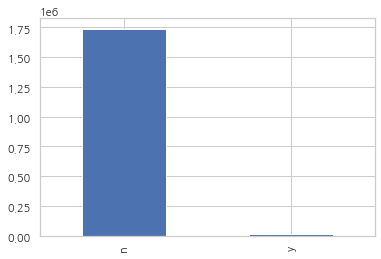

In [ ]:
df_kor['해지여부'].value_counts().plot(kind='bar')
plt.show()

### 해지율 피벗테이블 생성

In [ ]:
# 범주형 변수만 있는 데이터 생성: df_cat
# 주의: 종속변수도 빼먹지 말고 넣어주기
df_cat = df_kor.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,17,18,19,21,22,23,25,26,28,32,33,34]]   
df_cat.head()

,서비스이용일그룹,미디어그룹명,상품명글룹,구상품여부,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,번들상품가입여부,디지털기가가입여부,디지털아날로그여부,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널이용증가여부,선호채널,아이들나라이용여부,넷플릭시이용여부,유튜브이용여부,해지여부
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,N,N,N,N,수신,수신,비슷,기타,N,N,N,n
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,N,N,N,N,수신,수신,비슷,기타,N,N,N,n
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,N,N,N,N,수신,수신,비슷,기타,N,N,N,n
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,Y,N,N,N,수신,수신,감소,기타,N,N,N,n
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,N,N,N,N,전체거부,수신,비슷,KBS1,N,N,N,n


In [ ]:
# value count를 위한 임시 컬럼 추가
df_cat['Count'] = 1
df_cat.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,서비스이용일그룹,미디어그룹명,상품명글룹,구상품여부,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,번들상품가입여부,디지털기가가입여부,디지털아날로그여부,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널이용증가여부,선호채널,아이들나라이용여부,넷플릭시이용여부,유튜브이용여부,해지여부,Count
0,36개월 이상,HD,프리미엄,N,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,N,N,N,N,수신,수신,비슷,기타,N,N,N,n,1
1,36개월 이상,HD,프리미엄,N,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,N,N,N,N,수신,수신,비슷,기타,N,N,N,n,1
2,36개월 이상,HD,프리미엄,N,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,N,N,N,N,수신,수신,비슷,기타,N,N,N,n,1
3,36개월 이상,UHD,프리미엄,N,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,Y,N,N,N,수신,수신,감소,기타,N,N,N,n,1
4,36개월 이상,HD,베이직,N,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,N,N,N,N,전체거부,수신,비슷,KBS1,N,N,N,n,1


In [ ]:
# # 피벗 테이블 생성
# ATT_SVC_USE_DAYS_GRP = df_cat.pivot_table(index=df_cat['SVC_USE_DAYS_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_MEDIA_NM_GRP = df_cat.pivot_table(index=df_cat['MEDIA_NM_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_PROD_NM_GRP = df_cat.pivot_table(index=df_cat['PROD_NM_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_PROD_OLD_YN = df_cat.pivot_table(index=df_cat['PROD_OLD_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_AGMT_KIND_NM = df_cat.pivot_table(index=df_cat['AGMT_KIND_NM'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_STB_RES_1M_YN = df_cat.pivot_table(index=df_cat['STB_RES_1M_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_SVOD_SCRB_CNT_GRP = df_cat.pivot_table(index=df_cat['SVOD_SCRB_CNT_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_PAID_CHNL_SCRB_CNT_GRP = df_cat.pivot_table(index=df_cat['PAID_CHNL_SCRB_CNT_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_SCRB_PATH_NM_GRP = df_cat.pivot_table(index=df_cat['SCRB_PATH_NM_GRP'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_AGMT_END_SEG = df_cat.pivot_table(index=df_cat['AGMT_END_SEG'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_AGMT_END_YMD = df_cat.pivot_table(index=df_cat['AGMT_END_YMD'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_BUNDLE_YN = df_cat.pivot_table(index=df_cat['BUNDLE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_DIGITAL_GIGA_YN = df_cat.pivot_table(index=df_cat['DIGITAL_GIGA_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_DIGITAL_ALOG_YN = df_cat.pivot_table(index=df_cat['DIGITAL_ALOG_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_VOC_TOTAL_MONTH1_YN = df_cat.pivot_table(index=df_cat['VOC_TOTAL_MONTH1_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_EMAIL_RECV_CLS_NM = df_cat.pivot_table(index=df_cat['EMAIL_RECV_CLS_NM'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_SMS_SEND_CLS_NM = df_cat.pivot_table(index=df_cat['SMS_SEND_CLS_NM'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_CH_TMS_1_2_INCREASE_YN = df_cat.pivot_table(index=df_cat['CH_TMS_1_2_INCREASE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_CH_FAV_RANK1 = df_cat.pivot_table(index=df_cat['CH_FAV_RANK1'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_KIDS_USE_YN_MONTH1 = df_cat.pivot_table(index=df_cat['KIDS_USE_YN_MONTH1'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_NFX_USE_YN = df_cat.pivot_table(index=df_cat['NFX_USE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')
# ATT_YTB_USE_YN = df_cat.pivot_table(index=df_cat['YTB_USE_YN'], columns=df_cat['canel_yn'], aggfunc='sum')

In [ ]:
# # 해지율 컬럼 추가 & 높은 순서대로 정렬
# att_list = [
# ATT_SVC_USE_DAYS_GRP,
# ATT_MEDIA_NM_GRP,
# ATT_PROD_NM_GRP,
# ATT_PROD_OLD_YN,
# ATT_AGMT_KIND_NM,
# ATT_STB_RES_1M_YN,
# ATT_SVOD_SCRB_CNT_GRP,
# ATT_PAID_CHNL_SCRB_CNT_GRP,
# ATT_SCRB_PATH_NM_GRP,
# ATT_AGMT_END_SEG,
# ATT_AGMT_END_YMD,
# ATT_BUNDLE_YN,
# ATT_DIGITAL_GIGA_YN,
# ATT_DIGITAL_ALOG_YN,
# ATT_VOC_TOTAL_MONTH1_YN,
# ATT_EMAIL_RECV_CLS_NM,
# ATT_SMS_SEND_CLS_NM,
# ATT_CH_TMS_1_2_INCREASE_YN,
# ATT_CH_FAV_RANK1,
# ATT_KIDS_USE_YN_MONTH1,
# ATT_NFX_USE_YN,
# ATT_YTB_USE_YN
# ]

# for i in att_list:
#     i['churning_rate(%)'] = round((i[('Count', 'y')] / (i[('Count', 'n')] + i[('Count', 'y')])) * 100, 2)
#     i.sort_values(by=['churning_rate(%)'], ascending=False, inplace=True)
#     print(i, '\n')

In [ ]:
# df_num = df.columns.difference([
# 'SVC_USE_DAYS_GRP',
# 'MEDIA_NM_GRP',
# 'PROD_NM_GRP',
# 'PROD_OLD_YN',
# 'AGMT_KIND_NM',
# 'STB_RES_1M_YN',
# 'SVOD_SCRB_CNT_GRP',
# 'PAID_CHNL_SCRB_CNT_GRP',
# 'SCRB_PATH_NM_GRP',
# 'AGMT_END_SEG',
# 'AGMT_END_YMD',
# 'BUNDLE_YN',
# 'DIGITAL_GIGA_YN',
# 'DIGITAL_ALOG_YN',
# 'VOC_TOTAL_MONTH1_YN',
# 'EMAIL_RECV_CLS_NM',
# 'SMS_SEND_CLS_NM',
# 'CH_TMS_1_2_INCREASE_YN',
# 'CH_FAV_RANK1',
# 'KIDS_USE_YN_MONTH1',
# 'NFX_USE_YN',
# 'YTB_USE_YN'
# ])

In [ ]:
# df_num.dtype

### 변수삭제

In [ ]:
### 삭제변수
# ['1달이용금액',
# '3달이용금액',
# '넷플릭시이용여부',
# '유튜브이용여부',
# 'TV가입',
# 'TV인터넷가입건수',
# '디지털기가가입여부',
# '디지털아날로그여부',
# '아이들나라이용여부',
# '구상품여부']

In [ ]:
df_kor = df_kor.drop(['1달이용금액',
'3달이용금액',
'넷플릭시이용여부',
'유튜브이용여부',
'TV가입',
'TV인터넷가입건수',
'디지털기가가입여부',
'디지털아날로그여부',
'아이들나라이용여부',
'구상품여부'], axis=1)

In [ ]:
df_kor.head()

,서비스이용일그룹,미디어그룹명,상품명글룹,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,총이용일수,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,번들상품가입여부,VOC1개월발생여부,이메일수신분류명,SMS수신불류명,채널시간대별평균1달시간,채널이용증가여부,선호채널,아이들나라PV,아이들나라VOD이용여부,해지여부
0,36개월 이상,HD,프리미엄,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,0,2,0,0,N,N,수신,수신,13.77000,비슷,기타,0.00000,0.00000,n
1,36개월 이상,HD,프리미엄,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,0,5,0,0,N,N,수신,수신,5.80000,비슷,기타,0.00000,0.00000,n
2,36개월 이상,HD,프리미엄,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,0,1,0,0,N,N,수신,수신,0.00000,비슷,기타,0.00000,0.00000,n
3,36개월 이상,UHD,프리미엄,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,0,3,1,0,Y,N,수신,수신,6.43000,감소,기타,0.00000,0.00000,n
4,36개월 이상,HD,베이직,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,0,1,0,0,N,N,전체거부,수신,5.21000,비슷,KBS1,0.00000,0.00000,n


In [ ]:
df_kor.columns

Index(['서비스이용일그룹', '미디어그룹명', '상품명글룹', '약정종류', '셑탑1개월유지여부', 'SVOD가입건수',
       '유료채널가입그룹', '가입경로명', '약정종료', '약정종료년월', '총이용일수', '아날로그가입', '디지털가입',
       '총인터넷가입', '기가인터넷가입건수', '번들상품가입여부', 'VOC1개월발생여부', '이메일수신분류명', 'SMS수신불류명',
       '채널시간대별평균1달시간', '채널이용증가여부', '선호채널', '아이들나라PV', '아이들나라VOD이용여부', '해지여부'],
      dtype='object')

In [ ]:
# 범주형 변수와 연속형 변수 구분한 리스트 생성
num = df_kor.select_dtypes('number').columns.to_list()
cat = df_kor.select_dtypes('object').columns.to_list()

In [ ]:
num

['총이용일수',
 '아날로그가입',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 '채널시간대별평균1달시간',
 '아이들나라PV',
 '아이들나라VOD이용여부']

In [ ]:
cat

['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 '약정종료년월',
 '번들상품가입여부',
 'VOC1개월발생여부',
 '이메일수신분류명',
 'SMS수신불류명',
 '채널이용증가여부',
 '선호채널',
 '해지여부']

In [ ]:
len(num) + len(cat)

25

### 변수별 단변량 분석 시각화

In [ ]:
# 시각화 위한 컬럼 percentage 계산 함수
def percent_maker(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

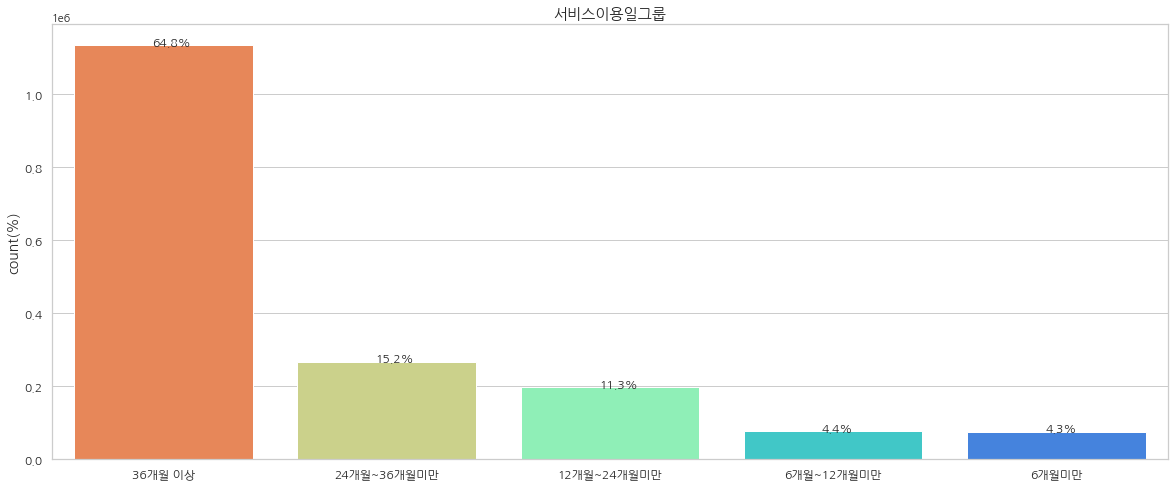

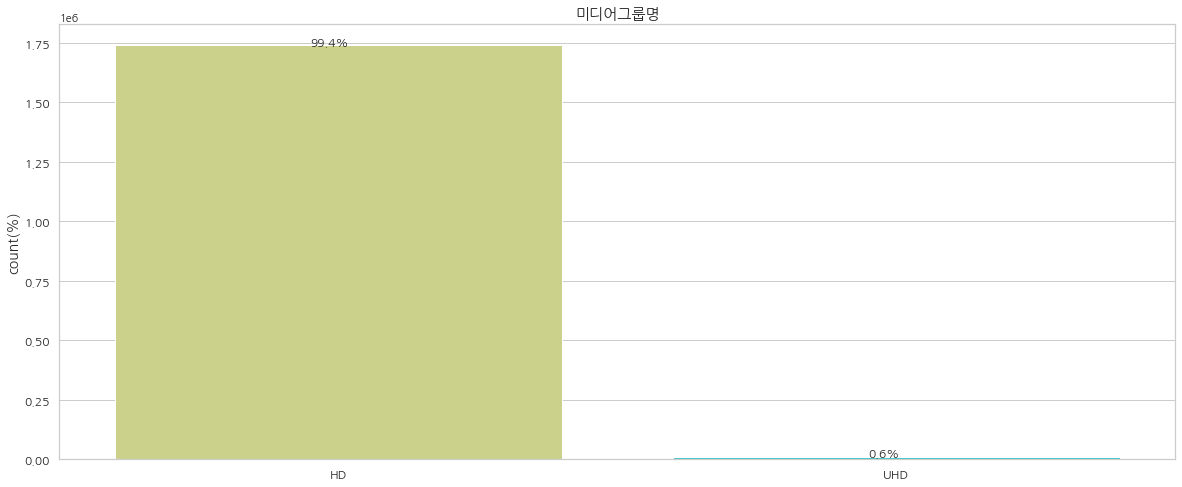

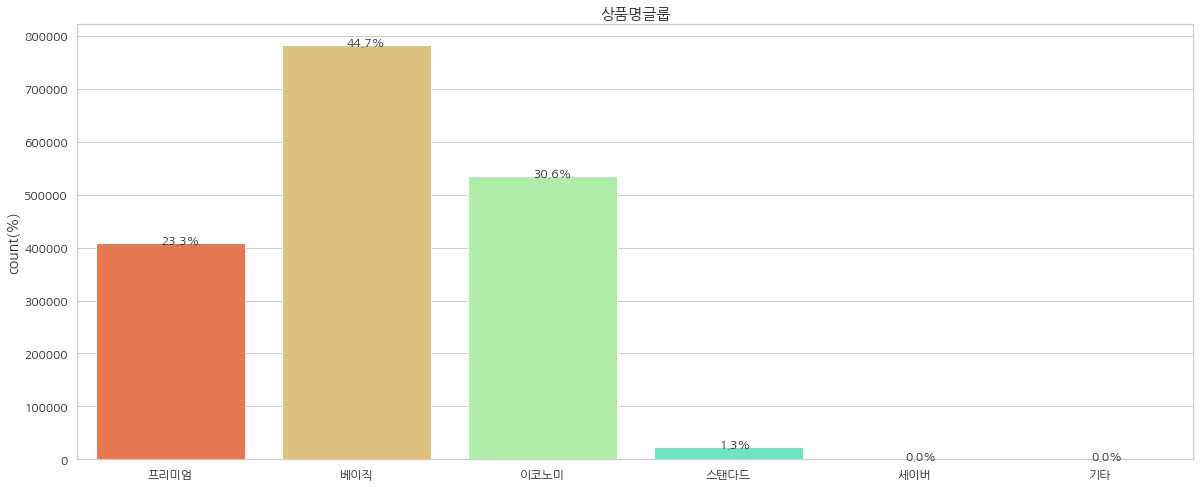

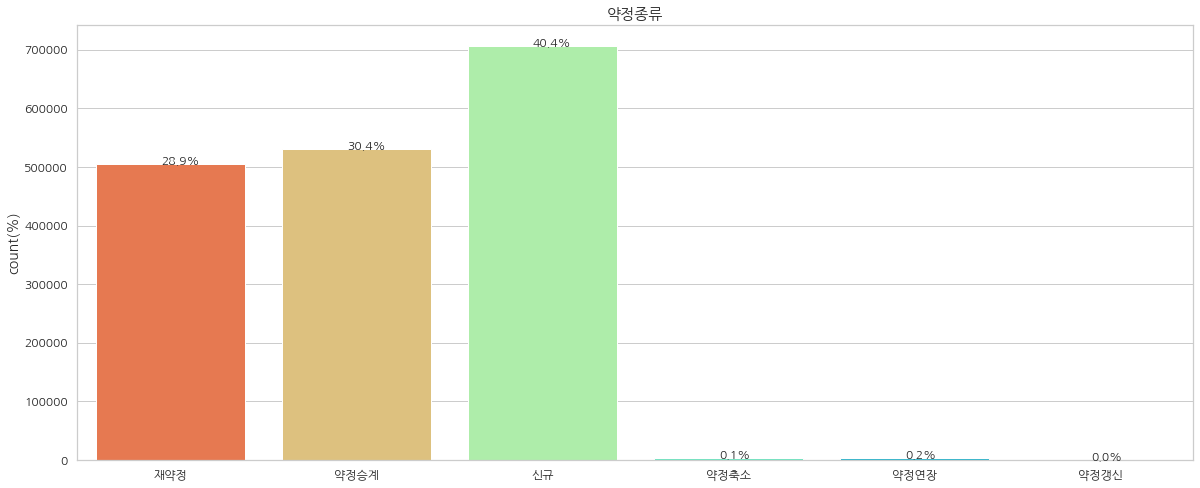

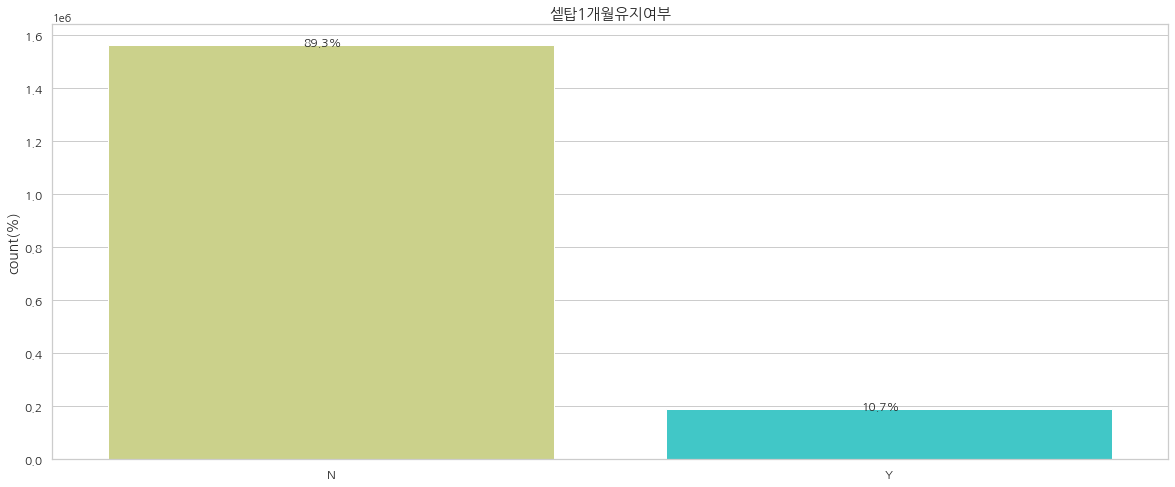

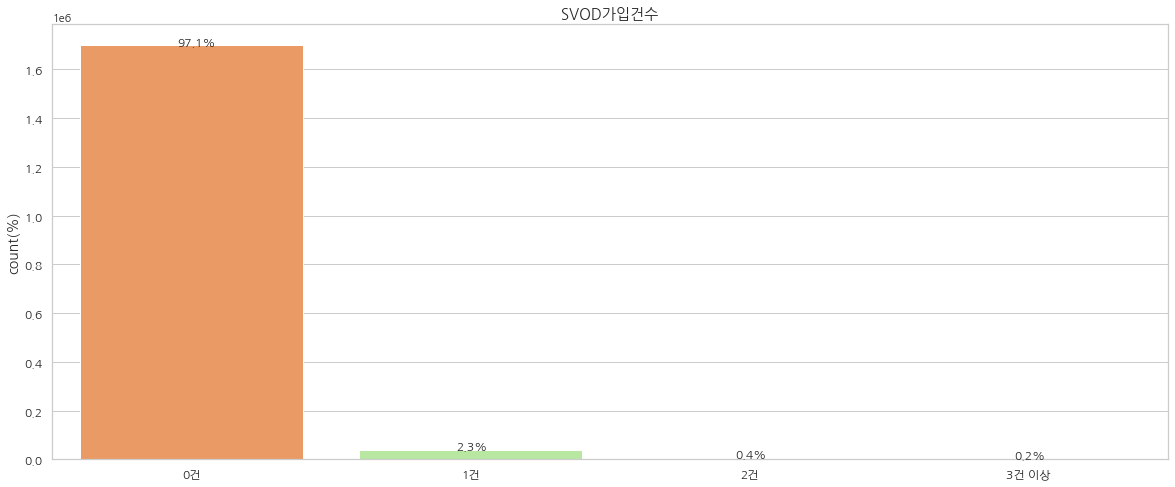

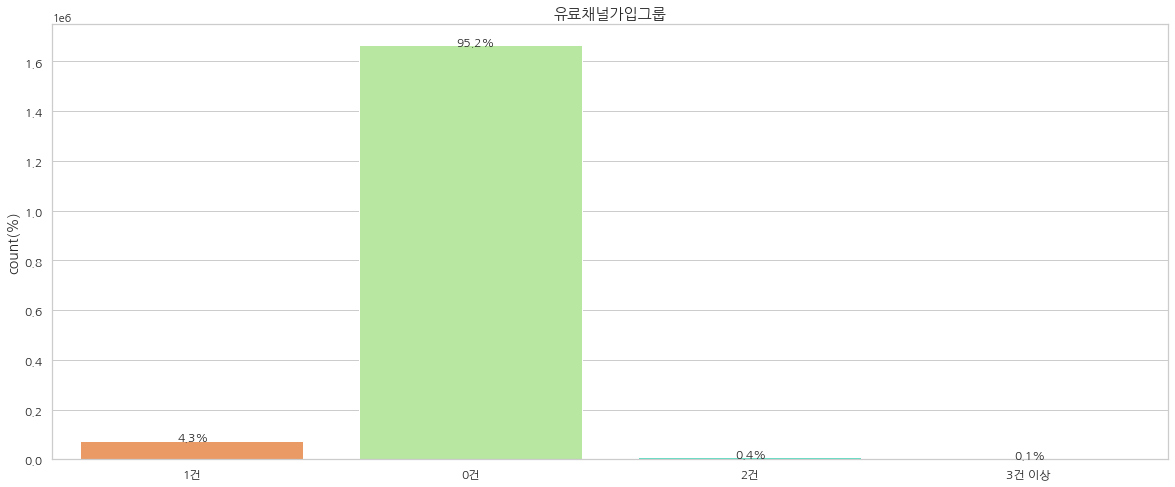

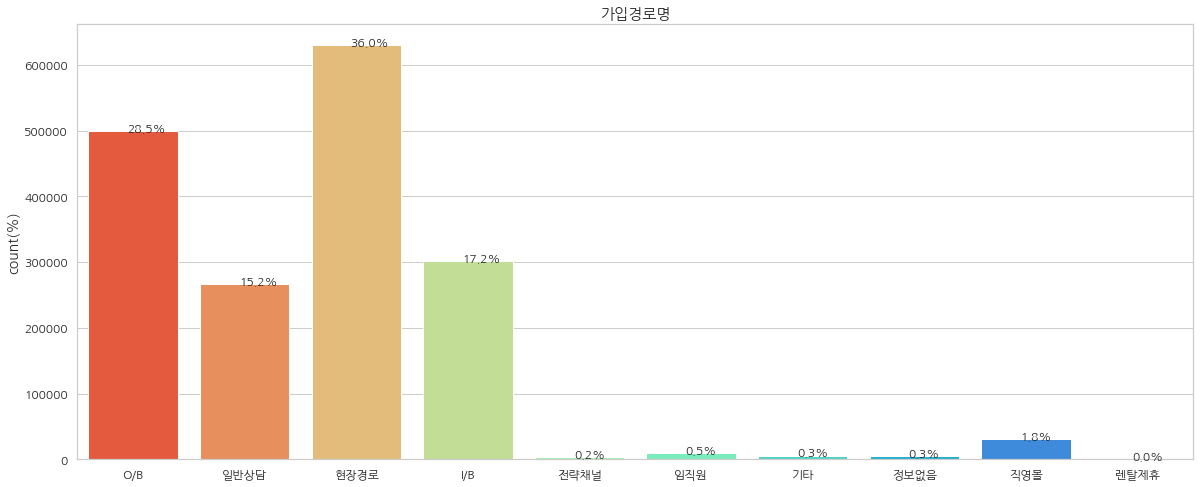

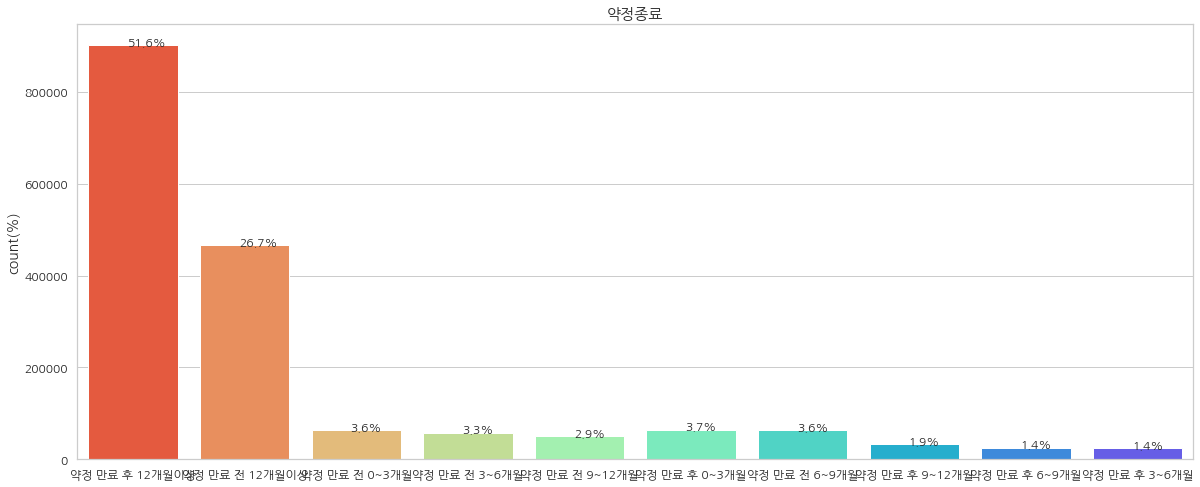

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

# 설명변수 중 범주형 변수 분포 확인
for i in df_kor:
    plt.figure(figsize=(20,8))
    ax = sns.countplot(x=i , data=df_kor ,palette='rainbow_r')
    plt.xticks(size = 12,fontproperties=fontprop)
    plt.xlabel('', fontsize=14,fontproperties=fontprop)
    plt.ylabel('count(%)', fontsize=14,fontproperties=fontprop)
    plt.yticks(size = 12,fontproperties=fontprop)
    plt.title(i, size = 15, fontproperties=fontprop)
    percent_maker(ax, df_kor[i])

### 연속형 변수 boxplot 확인

In [ ]:
num

In [ ]:
for i in num:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=df_kor[i])
    plt.title(i)
    plt.xlabel('')
    plt.show

### corr 확인

In [ ]:
corr_df = df_kor.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

### 변수 추가 삭제1

In [ ]:
# 마케팅 동의에 따른 해지율 차이 극소, 주고객 연령대 높아 마케팅 동의의 변별력 낮음
df_kor = df_kor.drop(['이메일수신분류명','SMS수신불류명'], axis=1)

In [ ]:
df_kor.head()

,서비스이용일그룹,미디어그룹명,상품명글룹,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,총이용일수,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,번들상품가입여부,VOC1개월발생여부,채널시간대별평균1달시간,채널이용증가여부,선호채널,아이들나라PV,아이들나라VOD이용여부,해지여부
0,36개월 이상,HD,프리미엄,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,0,2,0,0,N,N,13.77000,비슷,기타,0.00000,0.00000,n
1,36개월 이상,HD,프리미엄,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,0,5,0,0,N,N,5.80000,비슷,기타,0.00000,0.00000,n
2,36개월 이상,HD,프리미엄,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,0,1,0,0,N,N,0.00000,비슷,기타,0.00000,0.00000,n
3,36개월 이상,UHD,프리미엄,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,0,3,1,0,Y,N,6.43000,감소,기타,0.00000,0.00000,n
4,36개월 이상,HD,베이직,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,0,1,0,0,N,N,5.21000,비슷,KBS1,0.00000,0.00000,n


### 변수 추가 삭제2

In [ ]:
# KBS, OCN 등 해지율 높으나 지상파가 해지율이 높다던지하는 채널간 해지율의 공통점 보이지 않음
df_kor = df_kor.drop(['선호채널'], axis=1)

In [ ]:
df_kor.head()

,서비스이용일그룹,미디어그룹명,상품명글룹,약정종류,셑탑1개월유지여부,SVOD가입건수,유료채널가입그룹,가입경로명,약정종료,약정종료년월,총이용일수,아날로그가입,디지털가입,총인터넷가입,기가인터넷가입건수,번들상품가입여부,VOC1개월발생여부,채널시간대별평균1달시간,채널이용증가여부,아이들나라PV,아이들나라VOD이용여부,해지여부
0,36개월 이상,HD,프리미엄,재약정,N,0건,1건,O/B,약정 만료 후 12개월이상,20181013,2453,0,2,0,0,N,N,13.77000,비슷,0.00000,0.00000,n
1,36개월 이상,HD,프리미엄,재약정,N,0건,0건,O/B,약정 만료 후 12개월이상,20170804,2611,0,5,0,0,N,N,5.80000,비슷,0.00000,0.00000,n
2,36개월 이상,HD,프리미엄,약정승계,Y,0건,0건,O/B,약정 만료 후 12개월이상,20171030,2526,0,1,0,0,N,N,0.00000,비슷,0.00000,0.00000,n
3,36개월 이상,UHD,프리미엄,재약정,N,1건,0건,일반상담,약정 만료 전 12개월이상,20230204,3851,0,3,1,0,Y,N,6.43000,감소,0.00000,0.00000,n
4,36개월 이상,HD,베이직,약정승계,N,0건,0건,O/B,약정 만료 후 12개월이상,20130720,3170,0,1,0,0,N,N,5.21000,비슷,0.00000,0.00000,n


### 변수 추가 삭제3

In [ ]:
# 아날로그가입 0이 97프로 이상으로 유의미한 변수라고 생각되지 않음
df_kor = df_kor.drop(['아날로그가입'], axis=1)

In [ ]:
df_kor.columns

Index(['서비스이용일그룹', '미디어그룹명', '상품명글룹', '약정종류', '셑탑1개월유지여부', 'SVOD가입건수',
       '유료채널가입그룹', '가입경로명', '약정종료', '약정종료년월', '총이용일수', '디지털가입', '총인터넷가입',
       '기가인터넷가입건수', '번들상품가입여부', 'VOC1개월발생여부', '채널시간대별평균1달시간', '채널이용증가여부',
       '아이들나라PV', '아이들나라VOD이용여부', '해지여부'],
      dtype='object')

In [ ]:
# 범주형 변수와 연속형 변수 구분한 리스트 생성
num = df_kor.select_dtypes('number').columns.to_list()
cat = df_kor.select_dtypes('object').columns.to_list()

### 변수 추가 삭제4

In [ ]:
# 약정종료 년월 자체의 의미가 있을지 의문
df_kor = df_kor.drop(['약정종료년월'], axis=1)

In [ ]:
df_kor.columns

Index(['서비스이용일그룹', '미디어그룹명', '상품명글룹', '약정종류', '셑탑1개월유지여부', 'SVOD가입건수',
       '유료채널가입그룹', '가입경로명', '약정종료', '총이용일수', '디지털가입', '총인터넷가입', '기가인터넷가입건수',
       '번들상품가입여부', 'VOC1개월발생여부', '채널시간대별평균1달시간', '채널이용증가여부', '아이들나라PV',
       '아이들나라VOD이용여부', '해지여부'],
      dtype='object')

In [ ]:
df_raw = df_kor.copy()

In [ ]:
# 범주형 변수와 연속형 변수 구분한 리스트 생성
num = df_raw.select_dtypes('number').columns.to_list()
cat = df_raw.select_dtypes('object').columns.to_list()

In [ ]:
cat

['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 '번들상품가입여부',
 'VOC1개월발생여부',
 '채널이용증가여부',
 '해지여부']

### 선택된 변수 범주화 진행(get_dummies)

In [ ]:
categorical = ['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 '번들상품가입여부',
 'VOC1개월발생여부',
 '채널이용증가여부',
 '해지여부']
df_raw = pd.get_dummies(df_raw, columns = categorical, prefix = ['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 '번들상품가입여부',
 'VOC1개월발생여부',
 '채널이용증가여부',
 '해지여부'], drop_first = True)

In [ ]:
cat

['서비스이용일그룹',
 '미디어그룹명',
 '상품명글룹',
 '약정종류',
 '셑탑1개월유지여부',
 'SVOD가입건수',
 '유료채널가입그룹',
 '가입경로명',
 '약정종료',
 '번들상품가입여부',
 'VOC1개월발생여부',
 '채널이용증가여부',
 '해지여부']

In [ ]:
num

['총이용일수',
 '디지털가입',
 '총인터넷가입',
 '기가인터넷가입건수',
 '채널시간대별평균1달시간',
 '아이들나라PV',
 '아이들나라VOD이용여부']

In [ ]:
df_raw.columns

Index(['총이용일수', '디지털가입', '총인터넷가입', '기가인터넷가입건수', '채널시간대별평균1달시간', '아이들나라PV',
       '아이들나라VOD이용여부', '서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상',
       '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직',
       '상품명글룹_세이버', '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '약정종류_약정갱신',
       '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y',
       'SVOD가입건수_1건', 'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건',
       '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴',
       '가입경로명_일반상담', '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰',
       '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월',
       '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월',
       '약정종료_약정 만료 후 12개월이상', '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월',
       '약정종료_약정 만료 후 9~12개월', '번들상품가입여부_Y', 'VOC1개월발생여부_Y', '채널이용증가여부_비슷',
       '채널이용증가여부_시청없음', '채널이용증가여부_증가', '해지여부_y'],
      dtype='object')

In [ ]:
df_raw.astype('float')

,총이용일수,디지털가입,총인터넷가입,기가인터넷가입건수,채널시간대별평균1달시간,아이들나라PV,아이들나라VOD이용여부,서비스이용일그룹_24개월~36개월미만,서비스이용일그룹_36개월 이상,서비스이용일그룹_6개월~12개월미만,서비스이용일그룹_6개월미만,미디어그룹명_UHD,상품명글룹_베이직,상품명글룹_세이버,상품명글룹_스탠다드,상품명글룹_이코노미,상품명글룹_프리미엄,약정종류_약정갱신,약정종류_약정승계,약정종류_약정연장,약정종류_약정축소,약정종류_재약정,셑탑1개월유지여부_Y,SVOD가입건수_1건,SVOD가입건수_2건,SVOD가입건수_3건 이상,유료채널가입그룹_1건,유료채널가입그룹_2건,유료채널가입그룹_3건 이상,가입경로명_O/B,가입경로명_기타,가입경로명_렌탈제휴,가입경로명_일반상담,가입경로명_임직원,가입경로명_전략채널,가입경로명_정보없음,가입경로명_직영몰,가입경로명_현장경로,약정종료_약정 만료 전 12개월이상,약정종료_약정 만료 전 3~6개월,약정종료_약정 만료 전 6~9개월,약정종료_약정 만료 전 9~12개월,약정종료_약정 만료 후 0~3개월,약정종료_약정 만료 후 12개월이상,약정종료_약정 만료 후 3~6개월,약정종료_약정 만료 후 6~9개월,약정종료_약정 만료 후 9~12개월,번들상품가입여부_Y,VOC1개월발생여부_Y,채널이용증가여부_비슷,채널이용증가여부_시청없음,채널이용증가여부_증가,해지여부_y
0,2453.00000,2.00000,0.00000,0.00000,13.77000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,2611.00000,5.00000,0.00000,0.00000,5.80000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
2,2526.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
3,3851.00000,3.00000,1.00000,0.00000,6.43000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,3170.00000,1.00000,0.00000,0.00000,5.21000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749902,1968.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1749903,2046.00000,1.00000,0.00000,0.00000,9.62000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1749904,1982.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000

In [ ]:
feature_columns = list(df_raw.columns.difference(['해지여부_y']))
X = df_raw[feature_columns]    # 변인변수들의 데이터 Set
y = df_raw['해지여부_y']    # 종속변수 데이터를

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)    # Test Set을 0.2의 비율로 생성

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1399919, 52) (349980, 52) (1399919,) (349980,)


In [ ]:
df_raw.columns

Index(['총이용일수', '디지털가입', '총인터넷가입', '기가인터넷가입건수', '채널시간대별평균1달시간', '아이들나라PV',
       '아이들나라VOD이용여부', '서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상',
       '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직',
       '상품명글룹_세이버', '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '약정종류_약정갱신',
       '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y',
       'SVOD가입건수_1건', 'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건',
       '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴',
       '가입경로명_일반상담', '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰',
       '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월',
       '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월',
       '약정종료_약정 만료 후 12개월이상', '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월',
       '약정종료_약정 만료 후 9~12개월', '번들상품가입여부_Y', 'VOC1개월발생여부_Y', '채널이용증가여부_비슷',
       '채널이용증가여부_시청없음', '채널이용증가여부_증가', '해지여부_y'],
      dtype='object')

In [ ]:
# 연속형 변수 리스트(standard scaling 적용) 및 범주형 변수 리스트(minmax scaling 적용)

# standard_list = ['TOTAL_USED_DAYS',
#  'ANALOG_SCRB',
#  'DIGITAL_SCRB',
#  'TOTAL_INTERNET_SCRB',
#  'GIGA_INTERNET_SCRB',
#  'CH_HH_AVG_MONTH1',
#  'KIDS_USE_PV_MONTH1',
#  'KIDS_VOD_CNT_MONTH1']
minmax_list = ['총이용일수', '디지털가입', '총인터넷가입', '기가인터넷가입건수', '채널시간대별평균1달시간', '아이들나라PV',
       '아이들나라VOD이용여부', '서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상',
       '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직',
       '상품명글룹_세이버', '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '약정종류_약정갱신',
       '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y',
       'SVOD가입건수_1건', 'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건',
       '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴',
       '가입경로명_일반상담', '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰',
       '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월',
       '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월',
       '약정종료_약정 만료 후 12개월이상', '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월',
       '약정종료_약정 만료 후 9~12개월', '번들상품가입여부_Y', 'VOC1개월발생여부_Y', '채널이용증가여부_비슷',
       '채널이용증가여부_시청없음', '채널이용증가여부_증가']

In [ ]:
# 스케일링 적용 변수별 데이터 추출

# train_X1 = train_X[standard_list]
# test_X1 = test_X[standard_list]
train_X2 = train_X[minmax_list]
test_X2 = test_X[minmax_list]

In [ ]:
# 데이터 스케일링 진행

# scaler1 = StandardScaler()
# train_X1 = scaler1.fit_transform(train_X1)
# test_X1 = scaler1.transform(test_X1)

scaler2 = MinMaxScaler()
train_X2 = scaler2.fit_transform(train_X2)
test_X2 = scaler2.fit_transform(test_X2)

In [ ]:
# 스케일링 값으로 대체

# train_X[standard_list] = train_X1
# test_X[standard_list] = test_X1
train_X[minmax_list] = train_X2
test_X[minmax_list] = test_X2

In [ ]:
# 모든 데이터 값을 float32 type으로 변경

train_X = train_X.astype(np.float32)
test_X = test_X.astype(np.float32)
train_y = train_y.astype(np.float32)
test_y = test_y.astype(np.float32)

In [ ]:
# 머신러닝 데이터 처리 임포트
from sklearn.neighbors import KNeighborsClassifier    # 결측값을 위한 KNN 분류기
from sklearn.preprocessing import MinMaxScaler, StandardScaler    # 데이터 스케일링 라이브러리
from sklearn.decomposition import PCA, KernelPCA    # 차원 축소 라이브러리
from sklearn.model_selection import train_test_split, KFold    # Train/Test Set 구분 라이브러리
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN    # 오버샘플링 라이브러리
from imblearn.combine import SMOTEENN, SMOTETomek    # 복합샘플링 라이브러리

# 머신러닝 모델링 임포트
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.linear_model import LogisticRegression, Lasso, Ridge    # 로지스틱회귀, 라쏘, 릿지 라이브러리
from sklearn.tree import DecisionTreeClassifier    # 의사결정나무 라이브러리
from sklearn.ensemble import RandomForestClassifier    # Random Forest 라이브러리
from sklearn.svm import SVC    # SVC 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from lightgbm import LGBMClassifier    # LGBM 라이브러리
from sklearn.model_selection import GridSearchCV    # GridSearch 라이브러리

### 샘플링(랜덤오버샘플링)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# 랜덤언더샘플링 기법을 이용한 데이터 샘플링 진행
train_X_us, train_y_us = RandomUnderSampler(random_state = 55).fit_resample(train_X, train_y)

In [ ]:
# 모델 정확도 확인 함수 정의

def print_score(true, pred, train = True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict = True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

### 로지스틱 회귀분석

In [ ]:
selected = ['총이용일수', '디지털가입', '총인터넷가입', '기가인터넷가입건수', '채널시간대별평균1달시간', '아이들나라PV',
       '아이들나라VOD이용여부', '서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상',
       '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직',
       '상품명글룹_세이버', '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '약정종류_약정갱신',
       '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y',
       'SVOD가입건수_1건', 'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건',
       '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴',
       '가입경로명_일반상담', '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰',
       '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월',
       '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월',
       '약정종료_약정 만료 후 12개월이상', '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월',
       '약정종료_약정 만료 후 9~12개월', '번들상품가입여부_Y', 'VOC1개월발생여부_Y', '채널이용증가여부_비슷',
       '채널이용증가여부_시청없음', '채널이용증가여부_증가']

train_X_us1 = train_X_us[selected]
test_X1 = test_X[selected]

In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf = LogisticRegression() 

# 모델 학습 진행
lr_clf.fit(train_X_us1, train_y_us)

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 모델 정확도 확인
train_y_pred = lr_clf.predict(train_X_us1)
test_y_pred = lr_clf.predict(test_X1)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

Train Result:
Accuracy Score: 65.49%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision    0.64421    0.66728   0.65489     0.65574       0.65574
recall       0.69192    0.61785   0.65489     0.65489       0.65489
f1-score     0.66721    0.64161   0.65489     0.65441       0.65441
support   9423.00000 9423.00000   0.65489 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[6520 2903]
 [3601 5822]]

Test Result:
Accuracy Score: 69.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0        1.0  accuracy    macro avg  weighted avg
precision      0.99634    0.01342   0.69532      0.50488       0.98980
recall         0.69584    0.61796   0.69532      0.65690       0.69532
f1-score       0.81941    0.02626   0.69532      0.42283       0.81413
support   347653.00000 2327.00000   0.69532 349980.00000  349980.

### threshold에 따른 accuracy, recall 시각화

In [ ]:
# 로지스틱 회귀분석 모델 생성
lr_clf1 = LogisticRegression()

# 모델 학습 진행
lr_clf1.fit(train_X_us2, train_y_us)

# 모델 정확도 확인
train_y_pred = lr_clf1.predict(train_X_us2)
test_y_pred = lr_clf1.predict(test_X2)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Train Result:
Accuracy Score: 65.49%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision    0.64421    0.66728   0.65489     0.65574       0.65574
recall       0.69192    0.61785   0.65489     0.65489       0.65489
f1-score     0.66721    0.64161   0.65489     0.65441       0.65441
support   9423.00000 9423.00000   0.65489 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[6520 2903]
 [3601 5822]]

Test Result:
Accuracy Score: 69.53%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0        1.0  accuracy    macro avg  weighted avg
precision      0.99634    0.01342   0.69532      0.50488       0.98980
recall         0.69584    0.61796   0.69532      0.65690       0.69532
f1-score       0.81941    0.02626   0.69532      0.42283       0.81413
support   347653.00000 2327.00000   0.69532 349980.00000  349980.

### confusion matrix(accuracy, recall) 시각화

In [ ]:
# threshold 값의 변화에 따른 정확도와 검정력 확인

threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
df_thres = pd.DataFrame(index = threshold_list, columns = ['accuracy', 'recall'])

for thres in threshold_list :
  #print('=================== Threshold : ' + str(thres) + ' ===================')
  test_y_pred_prob = np.zeros(len(test_y_pred))

  for i in range(len(test_y_pred)) :
    if test_y_pred[i] > thres :
      test_y_pred_prob[i] = 1
  
  tp = confusion_matrix(test_y, test_y_pred_prob)[0][0]
  fn = confusion_matrix(test_y, test_y_pred_prob)[0][1]
  fp = confusion_matrix(test_y, test_y_pred_prob)[1][0]
  tn = confusion_matrix(test_y, test_y_pred_prob)[1][1]

  accuracy = (tp + tn) / (tp + fn + fp + tn)
  recall = tn / (fp + tn)

  df_thres.loc[thres, 'accuracy'] = accuracy
  df_thres.loc[thres, 'recall'] = recall

NameError: name 'test_y_pred' is not defined

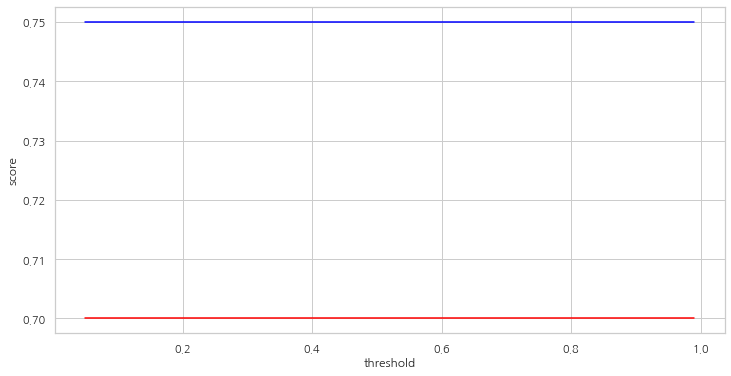

In [ ]:
# 시각화

fig, ax1 = plt.subplots(figsize = (12, 6))
ax2 = ax1.twinx()

lns1 = ax1.plot(df_thres.index, df_thres['accuracy'], label = 'accuracy', color = 'red')
lns2 = ax2.plot(df_thres.index, df_thres['recall'], label = 'recall', color = 'blue')
lns = lns1 + lns2
ax1.legend

ax1.grid()
ax1.set_xlabel('threshold')
plt.show()

### 랜덤포레스트

In [ ]:
# Train Set 및 Test Set 추출
check_list2 = ['총이용일수', '디지털가입', '총인터넷가입', '기가인터넷가입건수', '채널시간대별평균1달시간', '아이들나라PV',
       '아이들나라VOD이용여부', '서비스이용일그룹_24개월~36개월미만', '서비스이용일그룹_36개월 이상',
       '서비스이용일그룹_6개월~12개월미만', '서비스이용일그룹_6개월미만', '미디어그룹명_UHD', '상품명글룹_베이직',
       '상품명글룹_세이버', '상품명글룹_스탠다드', '상품명글룹_이코노미', '상품명글룹_프리미엄', '약정종류_약정갱신',
       '약정종류_약정승계', '약정종류_약정연장', '약정종류_약정축소', '약정종류_재약정', '셑탑1개월유지여부_Y',
       'SVOD가입건수_1건', 'SVOD가입건수_2건', 'SVOD가입건수_3건 이상', '유료채널가입그룹_1건',
       '유료채널가입그룹_2건', '유료채널가입그룹_3건 이상', '가입경로명_O/B', '가입경로명_기타', '가입경로명_렌탈제휴',
       '가입경로명_일반상담', '가입경로명_임직원', '가입경로명_전략채널', '가입경로명_정보없음', '가입경로명_직영몰',
       '가입경로명_현장경로', '약정종료_약정 만료 전 12개월이상', '약정종료_약정 만료 전 3~6개월',
       '약정종료_약정 만료 전 6~9개월', '약정종료_약정 만료 전 9~12개월', '약정종료_약정 만료 후 0~3개월',
       '약정종료_약정 만료 후 12개월이상', '약정종료_약정 만료 후 3~6개월', '약정종료_약정 만료 후 6~9개월',
       '약정종료_약정 만료 후 9~12개월', '번들상품가입여부_Y', 'VOC1개월발생여부_Y', '채널이용증가여부_비슷',
       '채널이용증가여부_시청없음', '채널이용증가여부_증가']

train_X_us2 = train_X_us[check_list2]
test_X3 = test_X[check_list2]

In [ ]:
# Random Forest 모델 생성
rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 8, max_features = 'auto', min_samples_split = 6, random_state = 123)    # n_estimators는 생성할 Tree의 개수. 개수가 많을수록 정확도가 올라가지만 모델 학습 시간이 길어짐

# 모델 학습 진행
rf_clf.fit(train_X_us2, train_y_us)

# 모델 정확도 확인
train_y_pred = rf_clf.predict(train_X_us2)
test_y_pred = rf_clf.predict(test_X3)

print_score(train_y_us, train_y_pred, train = True)
print_score(test_y, test_y_pred, train = False)

/home/ljy1115/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 67.82%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision    0.65396    0.71160   0.67823     0.68278       0.68278
recall       0.75708    0.59938   0.67823     0.67823       0.67823
f1-score     0.70175    0.65069   0.67823     0.67622       0.67622
support   9423.00000 9423.00000   0.67823 18846.00000   18846.00000
_______________________________________________
Confusion Matrix: 
 [[7134 2289]
 [3775 5648]]

Test Result:
Accuracy Score: 74.12%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0        1.0  accuracy    macro avg  weighted avg
precision      0.99611    0.01450   0.74116      0.50530       0.98958
recall         0.74233    0.56639   0.74116      0.65436       0.74116
f1-score       0.85070    0.02828   0.74116      0.43949       0.84523
support   347653.00000 2327.00000   0.74116 349980.00000  349980.

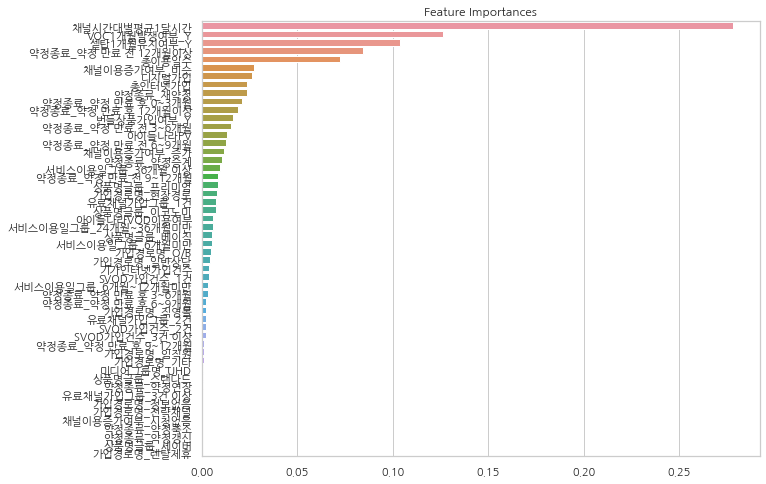

In [ ]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = test_X3.columns)
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
sns.barplot(x = ftr_importances, y = ftr_importances.index);

### 로지스틱회귀분석2

In [ ]:
# MyFakeClassifier의 예측 결과인 fakepred와 실제결과인 y_test를 confusion_matrix의 인자로 입력해서 출력
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, fake_prediction)
cm

In [ ]:
print('True Negative : ' , cm[0][0], ' --> (7이 아닌데 7이 아니라고 예측)')
print('False Positive : ', cm[0][1], '--> (7이 아닌데 7이라고 예측)')
print('False Negative : ', cm[1][0], '--> (7인데 7이 아니라고 예측)')
print('True Positigve: ', cm[1][1], '--> (7인데 7이라고 예측)')

In [ ]:
# 사이킷런의 정확도, 정밀도, 재현율, 오차행렬을 계산하는 API 호출
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 호출한 지표들을 한꺼번에 계산하는 함수 정의
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {:.4f}\n정밀도 : {:.4f}\n재현율 : {:.4f}'.format(accuracy, precision, recall))

In [ ]:
# 로지스틱 회귀 기반으로 타이타닉 생존자를 예측 후 평가 수행
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('Titanic/input/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

### standard scaling을 통해 진행

In [ ]:
corr_unstack = corr_df.unstack()
corr_unstack

In [ ]:
# seaborn 한글 폰트 설정
# path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
# 변수끼리의 상관성 확인

plt.figure(figsize=(30, 20))
sns.heatmap(corr_df, annot=True, linewidths=1, cmap='viridis');

### SVC_USE_DAYS_GRP와 TOTAL_USED_DAYS 비교하는 컬럼 만들기

In [ ]:
# TOTAL_USED_DAYS를 통해 USED_TERM_BY_TOTAL_USED_DAYS 컬럼을 생성
df.loc[df['TOTAL_USED_DAYS'] < 180, 'USED_TERM_BY_TOTAL_USED_DAYS'] = '~6M'
df.loc[(df['TOTAL_USED_DAYS'] >= 180) & (df['TOTAL_USED_DAYS'] < 360), 'USED_TERM_BY_TOTAL_USED_DAYS'] = '6M~12M'
df.loc[(df['TOTAL_USED_DAYS'] >= 360) & (df['TOTAL_USED_DAYS'] < 720), 'USED_TERM_BY_TOTAL_USED_DAYS'] = '12M~24M'
df.loc[(df['TOTAL_USED_DAYS'] >= 720) & (df['TOTAL_USED_DAYS'] < 1080), 'USED_TERM_BY_TOTAL_USED_DAYS'] = '24M~36M'
df.loc[df['TOTAL_USED_DAYS'] >= 1080, 'USED_TERM_BY_TOTAL_USED_DAYS'] = '36M~'

In [ ]:
# SVC_USE_DAYS_GRP을 통해 USED_TERM_BY_SVC_USE_DAYS_GRP 컬럼을 생성
df.loc[df['SVC_USE_DAYS_GRP'] == '6개월미만', 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '~6M'
df.loc[(df['SVC_USE_DAYS_GRP'] >= '6개월~12개월미만'), 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '6M~12M'
df.loc[(df['SVC_USE_DAYS_GRP'] >= '12개월~24개월미만'), 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '12M~24M'
df.loc[(df['SVC_USE_DAYS_GRP'] >= '24개월~36개월미만'), 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '24M~36M'
df.loc[df['SVC_USE_DAYS_GRP'] >= '36개월 이상', 'USED_TERM_BY_SVC_USE_DAYS_GRP'] = '36M~'

In [ ]:
df.head()

In [ ]:
df1 = df.loc[:,['USED_TERM_BY_TOTAL_USED_DAYS']]
df2 = df.loc[:,['USED_TERM_BY_SVC_USE_DAYS_GRP']]

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
df_concat = pd.concat([df1,df2], axis=1)

In [ ]:
df_concat.head()

In [ ]:
df_concat.loc[df_concat['USED_TERM_BY_TOTAL_USED_DAYS'] == df_concat['USED_TERM_BY_SVC_USE_DAYS_GRP'], 'TF'] = 'True'
df_concat.head()

In [ ]:
df_compare = df_concat[df_concat['TF'].isnull()]
df_compare.to_excel('/home/ljy1115/project/df_compare.xlsx', sheet_name='new_name')

### seaborn 한글설정하기

In [ ]:
# path = '/home/ljy1115/project/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fe = fm.FontEntry(fname='/home/ljy1115/project/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

In [ ]:
sns.set_theme(font ='NanumGothic', rc = {'axes.unicode_minus' : False}, style ='whitegrid')

### 한글설정 테스트

In [ ]:
pd.Series([1,3,5,-7,9]).plot(title= '한글');

In [ ]:

df_test = pd.DataFrame({"Day 1": [7,1,5,6,3,10,5,8],
                 "Day 2" : [1,2,8,4,3,9,5,2]})

p = sns.lineplot(data = df_test)
p.set(title = "한글");

In [ ]:
df['TOTAL_INTERNET_SCRB'].value_counts()

In [ ]:
df['KIDS_USE_PV_MONTH1'].value_counts()

In [ ]:
df_giga = df[['GIGA_INTERNET_SCRB','DIGITAL_GIGA_YN']]
df_giga

In [ ]:
df_giga_1 = df_giga.loc[df_giga['DIGITAL_GIGA_YN'] == 'Y']
df_giga_2 = df_giga.loc[df_giga['DIGITAL_GIGA_YN'] == 'N']

In [ ]:
df_giga_1.value_counts()

In [ ]:
df_giga_2.value_counts()

# 끝